In [25]:
#! pip install opencv-python
#! pip install imgaug



import os
import math
import cv2 as cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf


from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,TensorBoard, Callback
from keras.optimizers import Adam, Optimizer
import keras.backend as K

from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.utils import class_weight

import imgaug as ia
import imgaug.augmenters as iaa



from sklearn.model_selection import KFold, StratifiedKFold
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import Sequence, to_categorical


import random





import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline







(60000, 28, 28)


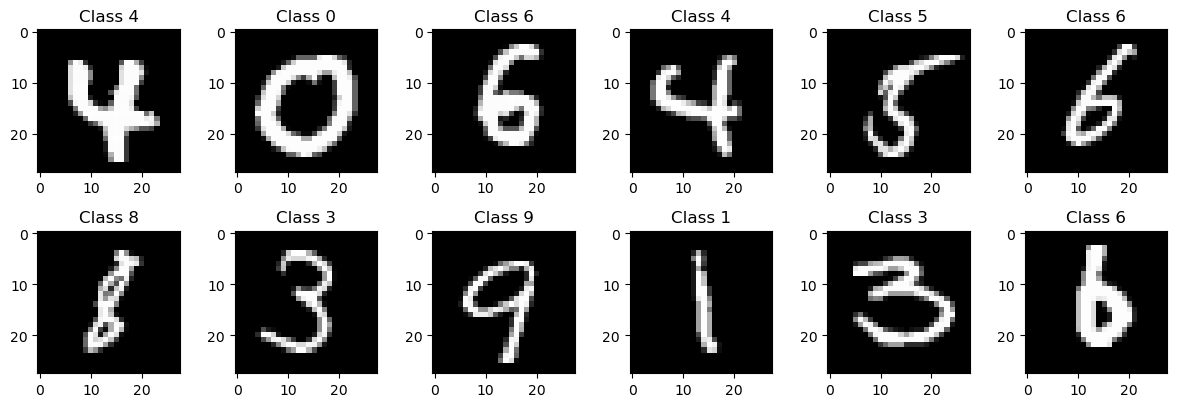

In [26]:
# Data Preprocessing
(x_train, y_train),(x_test,y_test) = datasets.mnist.load_data()

# First Visualizations
plt.figure(figsize = (12,12))
index_random = np.random.randint(0,x_train.shape[0],12)

for ind, iter in enumerate(index_random):
    plt.subplot(6,6,ind + 1) 
    plt.imshow(x_train[iter],cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' %y_train[iter])
plt.tight_layout()

print(x_train.shape)


In [27]:
# Checking Nan Values
print(np.isnan(x_test).any())
print(np.isnan(x_train).any())


False
False


tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


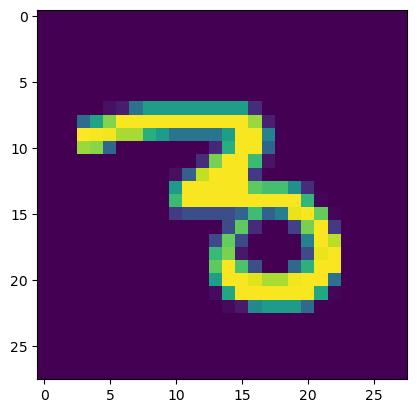

In [28]:
# Normalization and Reshaping
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)# reshaping 
x_test = x_test/255.0 # normalization

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)# reshaping 
x_train = x_train/255.0

# One Hot Encoding
y_test = tf.one_hot(y_test.astype(np.int32),depth = 10) 
y_train = tf.one_hot(y_train.astype(np.int32),depth = 10) 

# Data Visualization
plt.imshow(x_train[30][:,:,0])
print(y_train[30])#label 


In [29]:
#Deep Learning
inp_shape = (28,28,1)
batch_size = 64
epochs = 5 
class_num = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=inp_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(class_num, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

# Model Fitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)




Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 108ms/step - acc: 0.8940 - loss: 0.3270 - val_acc: 0.9902 - val_loss: 0.0376
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - acc: 0.9875 - loss: 0.0419 - val_acc: 0.9883 - val_loss: 0.0403
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 136s 99ms/step - acc: 0.9921 - loss: 0.0261 - val_acc: 0.9880 - val_loss: 0.0482
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - acc: 0.9934 - loss: 0.0203 - val_acc: 0.9933 - val_loss: 0.0326
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 105ms/step - acc: 0.9947 - loss: 0.0157 - val_acc: 0.9913 - val_loss: 0.0358


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.9866 - loss: 0.0435
Test Accuracy: % 99.01999831199646
Test Loss: 0.03323494270443916


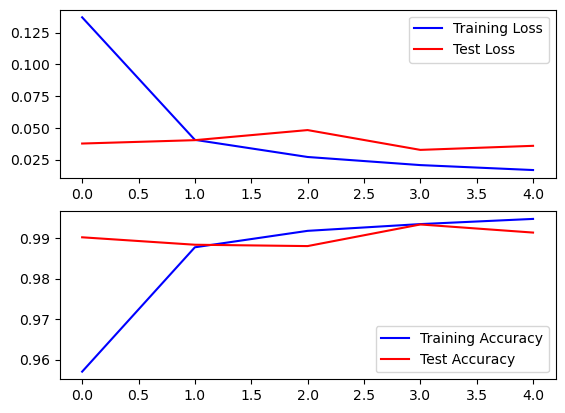

In [31]:
# Evaluation 

model_eval = model.evaluate(x_test,y_test)# (loss ,accuracy)
print('Test Accuracy: %',model_eval[1]*100)
print('Test Loss:', model_eval[0])

# Accuracy Loss Graph 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Test Loss")
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Test Accuracy")
legend = ax[1].legend(loc='best')



In [32]:
# Comparison of Results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
true_y = np.argmax(y_test,axis = 1)
error_info = (y_pred_classes - true_y!= 0)
pred_errors = y_pred_classes[error_info]
y_pred_error = y_pred[error_info]
y_true_error = true_y[error_info]
x_val_error = x_test[error_info]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


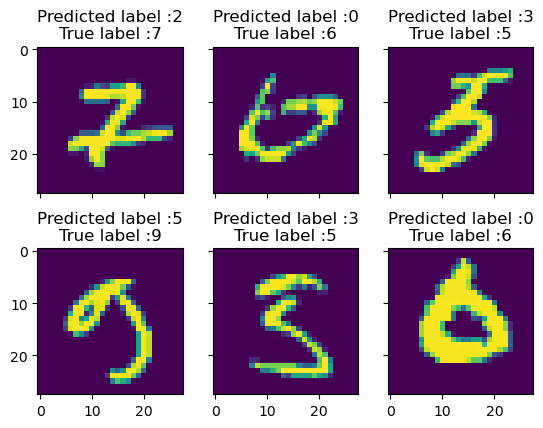

In [36]:
y_pred_errors_prob = np.max(y_pred_error,axis = 1)
true_prob_errors = np.diagonal(np.take(y_pred_error, y_true_error, axis=1))
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_dela_errors[-6:]
display_errors(most_important_errors, x_val_error, pred_errors, y_true_error)

In [37]:
Y_pred = model.predict(x_test)
y_true = np.argmax(y_test,axis=1)

correct_labels = np.nonzero(y_pred_classes==y_true)[0]
mis_classified = np.nonzero(y_pred_classes!=y_true)[0]


def plot_images(data_index,cmap="Blues"):
    
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],y_pred_classes[indx]))
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


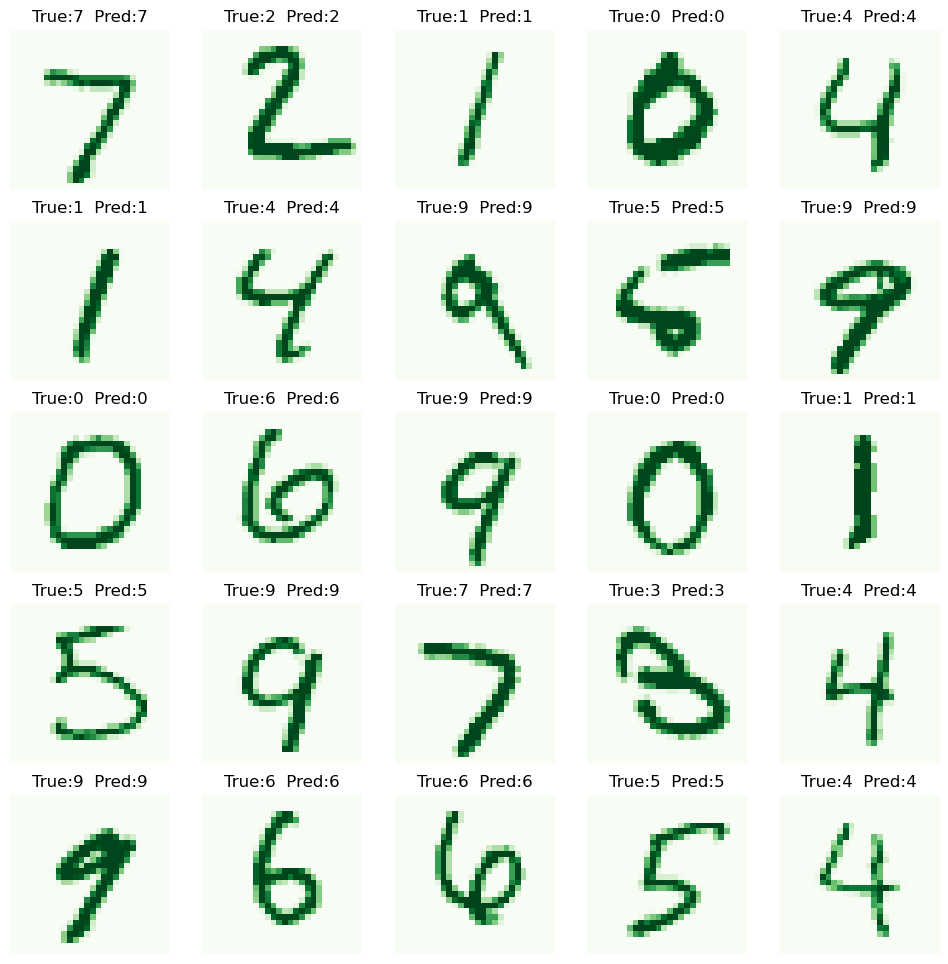

****************************


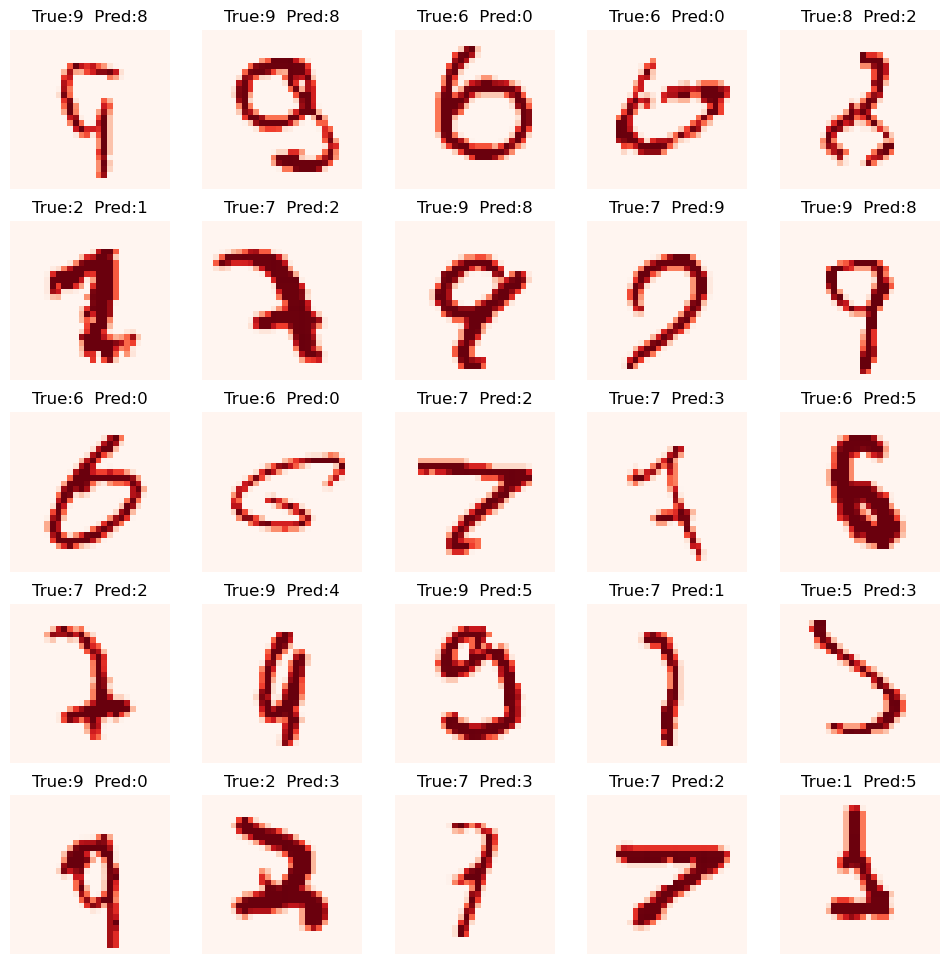

In [39]:
plot_images(correct_labels,"Greens")
print('****************************')
plot_images(mis_classified,"Reds")